In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf # Used for Loading Datasets.

%matplotlib inline

/home/mohsin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mohsin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mohsin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mohsin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

In [2]:
(x_train, true), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train,x_test = x_train/255.0 ,x_test/255.0
inputs = x_train.reshape(x_train.shape[0],784)
test = x_test.reshape(x_test.shape[0],784)

In [3]:
test_true = pd.get_dummies(y_test).values
true = pd.get_dummies(true).values
print ("Inputs Shape {}".format(inputs.shape))
print ("True Shape {}".format(true.shape))

Inputs Shape (60000, 784)
True Shape (60000, 10)


In [4]:
weights = np.random.normal(size=(inputs.shape[1],true.shape[1])).T

In [5]:
weights.shape

(10, 784)

In [6]:
def neural_network(data_point,weights):
    outputs = np.dot(data_point,weights.T)
    return outputs

In [7]:
alpha = 0.001
t_epochs = 100

for epoch in range(t_epochs):
    error = np.zeros(len(inputs))
    counter = 0
    for data_point,label in zip(inputs,true):
        pred = neural_network(data_point, weights)
        deltas = (pred - label)
        error[counter] = sum((pred - label) ** 2)
        counter +=1
        weights -= alpha * np.outer(deltas, data_point)
    print (f"Epoch {epoch} error: {error.sum()}")

Epoch 0 error: 1798014.9536142887
Epoch 1 error: 398278.9233674927
Epoch 2 error: 217956.64954957896
Epoch 3 error: 146934.58338362197
Epoch 4 error: 111246.33959231702
Epoch 5 error: 90561.33273212363
Epoch 6 error: 77333.66431851388
Epoch 7 error: 68242.72587504705
Epoch 8 error: 61645.31334654581
Epoch 9 error: 56652.68904995196
Epoch 10 error: 52748.812036903015
Epoch 11 error: 49616.01179182042
Epoch 12 error: 47048.916139542176
Epoch 13 error: 44909.13198816103
Epoch 14 error: 43100.049763257965
Epoch 15 error: 41552.16255269023
Epoch 16 error: 40214.15304738134
Epoch 17 error: 39047.28195279365
Epoch 18 error: 38021.73882382026
Epoch 19 error: 37114.199466119484
Epoch 20 error: 36306.14812602167
Epoch 21 error: 35582.69801076892
Epoch 22 error: 34931.74475690766
Epoch 23 error: 34343.34747470037
Epoch 24 error: 33809.26859733418
Epoch 25 error: 33322.626647986224
Epoch 26 error: 32877.630678300404
Epoch 27 error: 32469.374699886823
Epoch 28 error: 32093.67680835584
Epoch 29 erro

In [8]:
index = 12
np.argmax(neural_network(inputs[index],weights))

3

In [9]:
true[index]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=uint8)

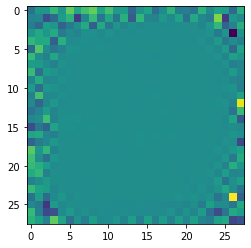

In [10]:
plt.imshow(weights[4].reshape(28,28))